In [1]:
from style import HTMLStyler

styler = HTMLStyler()


In [2]:
styler.exec_styled_cell(-1)


In [3]:
styler.exec_styled_cell(0)


In [4]:
styler.exec_styled_cell(1)


In [5]:
styler.exec_styled_cell(2)


In [6]:
styler.exec_styled_cell(3)


In [7]:
styler.exec_styled_cell(4)


In [8]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.precision", 2)
np.set_printoptions(precision=2, suppress=True)

housing = fetch_california_housing(as_frame=True)

features = housing.data
target = housing.target
housing = pd.concat([features, target], axis=1)


In [9]:
styler.exec_styled_cell(5)


In [10]:
styler.exec_styled_cell(6)


In [11]:
styler.exec_styled_cell(7)


In [12]:
styler.exec_styled_cell(8)


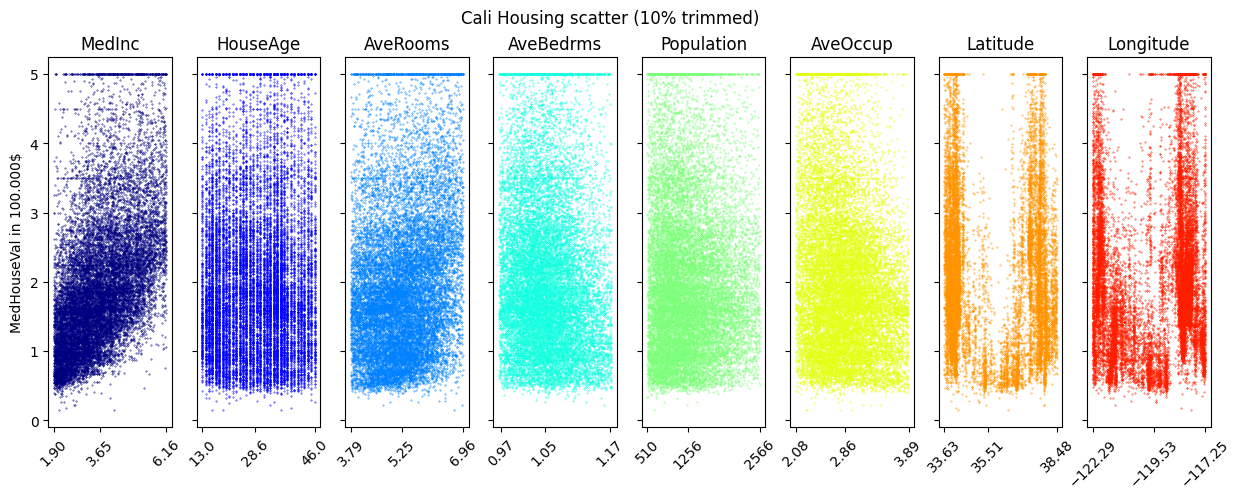

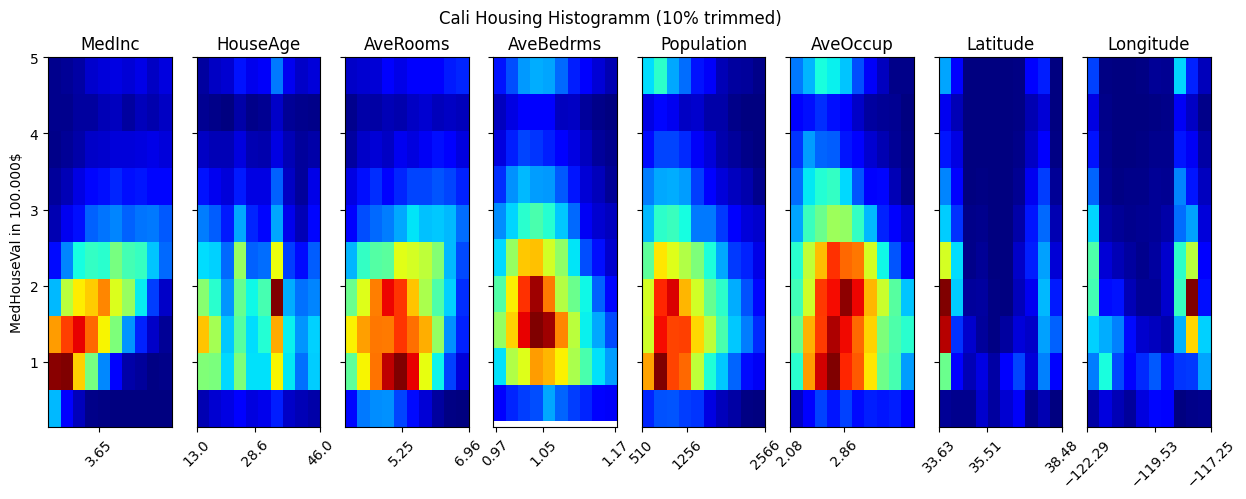

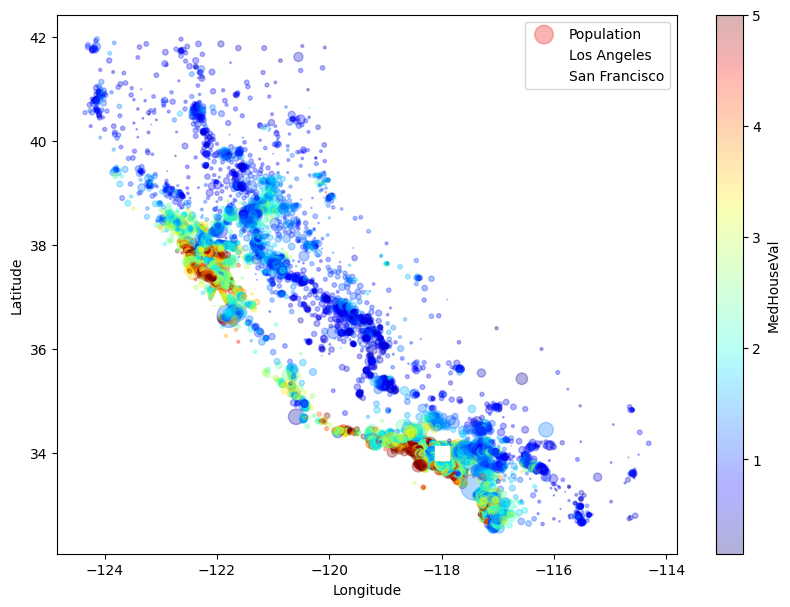

In [13]:
from presentation.printing import scatter_2d_dataset
from presentation.printing import hist_2d_dataset
from presentation.printing import map_plot

x = features.to_numpy()
y = target.to_numpy()
naming = features.columns.values.tolist()

scatter_2d_dataset(
    x, y, naming, title="Cali Housing scatter (10% trimmed)", alpha=1, trim_percent=10)

hist_2d_dataset(
    x, y, naming, title="Cali Housing Histogramm (10% trimmed)", trim_percent=10)

map_plot(pd.concat([features, target], axis=1))


In [14]:
styler.exec_styled_cell(9)


In [15]:
styler.exec_styled_cell(10)


In [16]:
from presentation.printing import highlight_corr

cor_un = housing.corr()
cor_un.style.applymap(highlight_corr)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [17]:
styler.exec_styled_cell(11)


In [18]:
from calculations import calc_corr

feats = [
    features["MedInc"],
    features["HouseAge"],
    features["AveRooms"],
    features["AveBedrms"],
    features["Population"],
    features["AveOccup"],
    features["Latitude"],
    features["Longitude"],
]

corrs = calc_corr(feats, target)
indecees = features.columns.values
corr_wa = pd.DataFrame(
    index=indecees,
    data=corrs,
    columns=["MedHouseVal"]
)
print(corr_wa.sort_values(
    by="MedHouseVal",
    ascending=False)
)


            MedHouseVal
MedInc             0.69
AveRooms           0.15
HouseAge           0.11
AveOccup          -0.02
Population        -0.02
Longitude         -0.05
AveBedrms         -0.05
Latitude          -0.14


In [19]:
styler.exec_styled_cell(12)


In [20]:
styler.exec_styled_cell(13)


In [21]:
styler.exec_styled_cell(14)


In [23]:
from sklearn.preprocessing import StandardScaler

x = features.to_numpy()
y = target.to_numpy()

x_pre_scaled = x

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)


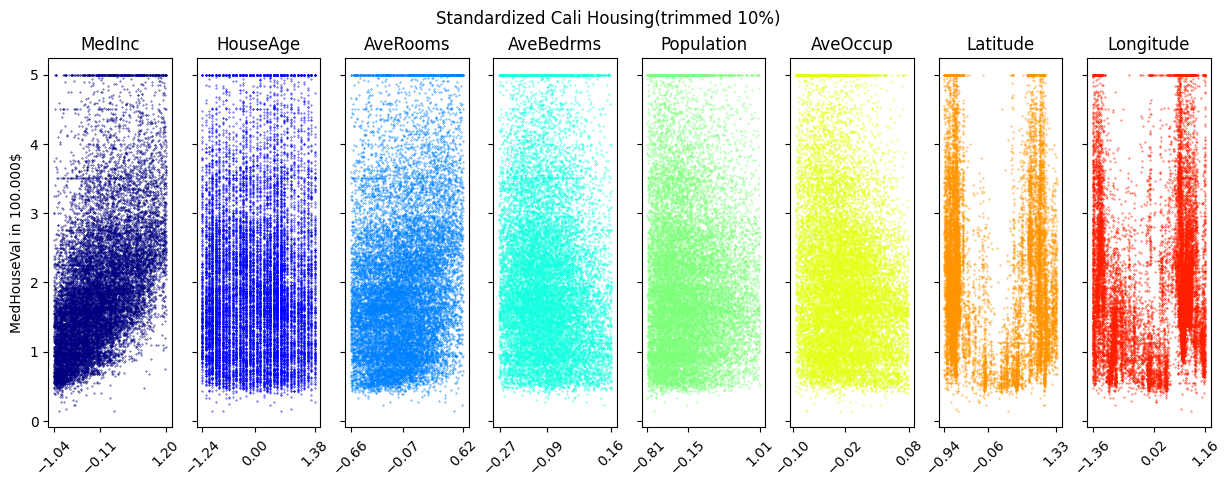

In [24]:
scatter_2d_dataset(
    x, y, naming, title="Standardized Cali Housing(trimmed 10%) ", alpha=1, trim_percent=10)


In [25]:
styler.exec_styled_cell(15)


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f"x train size: {x_train.shape}")
print(f"y train size: {y_train.shape}")
print(f"x test size: {x_test.shape}")
print(f"y test size: {y_test.shape}")


x train size: (16512, 8)
y train size: (16512,)
x test size: (4128, 8)
y test size: (4128,)


In [27]:
styler.exec_styled_cell(16)


In [28]:
styler.exec_styled_cell(17)


In [29]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)


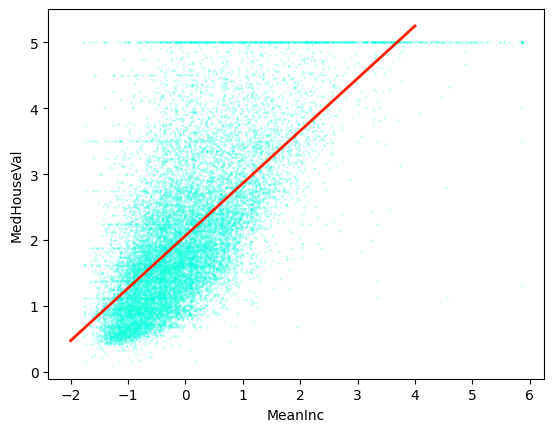

In [30]:
from presentation.printing import lin_plot

lins = np.linspace(-2, 4, 100)
regr = LinearRegression()
regr.fit(x_train[:, 0].reshape(-1, 1), y_train)
y_pred = regr.predict(lins.reshape(-1, 1))

lin_plot(x=x, y=y, y_pred=y_pred, x_test=lins)


In [31]:
styler.exec_styled_cell(18)


In [32]:
styler.exec_styled_cell(19)


In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

score = r2_score(y_test[:100], y_pred)
mape = mean_absolute_percentage_error(y_test[:100], y_pred)

print(f"score: {score:.2f}")
print(f"mape: {mape*100:.2f}%")


score: -1.70
mape: 124.99%


In [34]:
styler.exec_styled_cell(20)


In [35]:
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

score = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"score: {score:.2f}")
print(f"mape: {mape*100:.2f}%")


score: 0.59
mape: 30.71%


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

"""
regr = DecisionTreeRegressor()

hyperparameters = {
    "criterion": ["absolute_error"],
    "max_depth": [15, 20, 30],
    "min_samples_split": [15, 20, 25],
    "min_samples_leaf": [10, 15, 20],
}

grid = GridSearchCV(regr, hyperparameters, cv=10, scoring="r2", n_jobs=-1)
grid.fit(x_train, y_train)

mean_test_scores = grid.cv_results_["mean_test_score"]
std_test_scores = grid.cv_results_["std_test_score"]
params = grid.cv_results_["params"]

for mean, std, params in zip(mean_test_scores, std_test_scores, params):
    print(f"mean: {mean}, std: {std}, params: {params}")

best_params = grid.best_params_
best_score = grid.best_score_
print(f"best found parsameters: {best_params}")
print(f"best score: {best_score}")"""

'\nregr = DecisionTreeRegressor()\n\nhyperparameters = {\n    "criterion": ["absolute_error"],\n    "max_depth": [15, 20, 30],\n    "min_samples_split": [15, 20, 25],\n    "min_samples_leaf": [10, 15, 20],\n}\n\ngrid = GridSearchCV(regr, hyperparameters, cv=10, scoring="r2", n_jobs=-1)\ngrid.fit(x_train, y_train)\n\nmean_test_scores = grid.cv_results_["mean_test_score"]\nstd_test_scores = grid.cv_results_["std_test_score"]\nparams = grid.cv_results_["params"]\n\nfor mean, std, params in zip(mean_test_scores, std_test_scores, params):\n    print(f"mean: {mean}, std: {std}, params: {params}")\n\nbest_params = grid.best_params_\nbest_score = grid.best_score_\nprint(f"best found parsameters: {best_params}")\nprint(f"best score: {best_score}")'

In [37]:
styler.exec_styled_cell(21)


In [38]:
regr = DecisionTreeRegressor(
    **{'criterion': 'absolute_error', 'max_depth': 30, 'min_samples_leaf': 15, 'min_samples_split': 25}
)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

score = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"score: {score:.2f}")
print(f"mape: {mape*100:.2f}%")


score: 0.72
mape: 20.37%


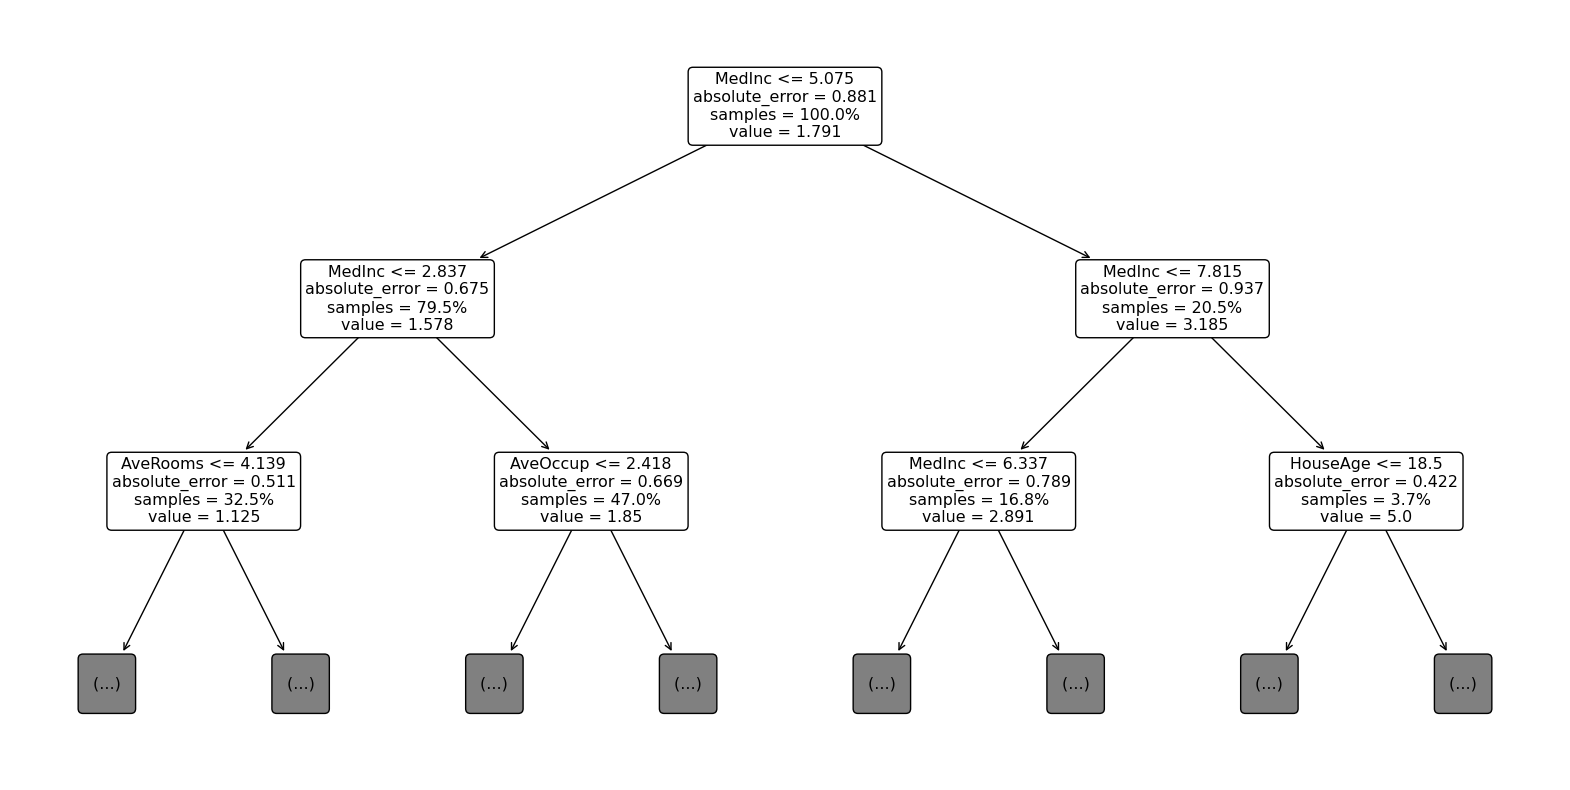

In [39]:
from presentation.printing import plot_prescaled_tree

params = {'criterion': 'absolute_error', 'max_depth': 30,
          'min_samples_leaf': 15, 'min_samples_split': 25}
plot_prescaled_tree(x=x_pre_scaled, y=y, params=params,
                    feature_names=housing.columns.values.tolist())


In [40]:
styler.exec_styled_cell(22)


In [41]:
styler.exec_styled_cell(23)


In [42]:
import joblib

joblib.dump(regr, "Cali_Housing_DecissionTree.pkl", compress=9)


['Cali_Housing_DecissionTree.pkl']

In [43]:
styler.exec_styled_cell(24)


In [44]:
local_model = joblib.load("Cali_Housing_DecissionTree.pkl")
# local_model.predict(X)


In [45]:
styler.exec_styled_cell(25)

from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor()

hyperparams = {
"loss": ["absolute_error"],
"n_estimators": [200, 250, 300],
"max_depth": [20, 30],
"min_samples_split": [45, 60, 80],
"min_samples_leaf": [3, 5, 8],
}

grid = GridSearchCV(regr, hyperparams, cv=10, scoring="r2", n_jobs=-1)
grid.fit(x_train, y_train)

mean*test_scores = grid.cv_results*["mean_test_score"]
std*test_scores = grid.cv_results*["std_test_score"]
params = grid.cv*results*["params"]

for mean, std, params in zip(mean_test_scores, std_test_scores, params):
print(f"params: {params}, mean: {mean:.2f}, std: {std:.2f}")

best*params = grid.best_params*
best*score = grid.best_score*

print(f"best_params: {best_params}")
print(f"best_score: {best_score:.2f}")


regr = GradientBoostingRegressor(\*\*best_params)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
score = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"r2_score: {score:.2f}")
print(f"mape: {mape\*100:.2f} %")
